In [43]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score

# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [44]:
# Load the Iris dataset included with scikit-learn

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [45]:
# Put data in a pandas DataFrame

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [46]:
# Add target and class to DataFrame

df_iris["target"] = iris.target

df_iris["class"] = iris.target_names[iris.target]

In [47]:
# Show 10 random samples

df_iris.sample(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa
100,6.3,3.3,6.0,2.5,2,virginica
40,5.0,3.5,1.3,0.3,0,setosa
86,6.7,3.1,4.7,1.5,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
71,6.1,2.8,4.0,1.3,1,versicolor


In [48]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [49]:
# now... implement the LDA (bear in mind that you do pass it the y's and it is supervised!)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()


In [50]:
# same process as always, identify your X's and your y's

x = df_iris.iloc[:,0:-2]
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [51]:
y = df_iris.iloc[:,-2]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [52]:
#train-test-split

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.3, random_state=0)

In [53]:
# Scale the X's

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# apply the lda transformation

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

In [55]:
lda.fit(X_train_scaled , y_train)

LinearDiscriminantAnalysis()

In [56]:
train_predicttions = lda.predict(X_train_scaled)

In [57]:
train_predicttions

array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [58]:
train_predicttions == y_train

60     True
116    True
144    True
119    True
108    True
       ... 
9      True
103    True
67     True
117    True
47     True
Name: target, Length: 105, dtype: bool

In [59]:
(train_predicttions == y_train).sum() / len (y_train)    # ei same jinishtai jodi without scaling chara 
                                                            #  kori Accuricy onek baje asbe......

0.9809523809523809

In [60]:
test_predicttions = lda.predict(X_test_scaled)

In [61]:
test_predicttions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [62]:
test_predicttions == y_test

114     True
62      True
33      True
107     True
7       True
100     True
40      True
86      True
76      True
71      True
134     True
51      True
73      True
54      True
63      True
37      True
78      True
90      True
45      True
16      True
121     True
66      True
24      True
8       True
126     True
22      True
44      True
97      True
93      True
26      True
137     True
84      True
27      True
127     True
132     True
59      True
18      True
83     False
61      True
92      True
112     True
2       True
141     True
43      True
10      True
Name: target, dtype: bool

In [63]:
(test_predicttions == y_test).sum() / len (y_test)

0.9777777777777777

# Dimentionality Reduction 

In [64]:
X_LDA = lda.transform (X_train_scaled)
X_LDA

array([[-0.93534728,  2.56340654],
       [-4.9854655 ,  0.12984179],
       [-6.71818728, -2.28054655],
       [-4.50416279,  2.1562057 ],
       [-6.05586017,  1.42531684],
       [-0.85339282,  1.58864502],
       [-6.24525673, -0.85251282],
       [-2.35585784, -0.7209366 ],
       [-0.84540183,  1.70265893],
       [-4.07198666,  0.13954656],
       [-3.67867911,  0.99586764],
       [-4.85461429,  0.63957594],
       [-4.815563  ,  0.36717819],
       [-1.03351774, -0.06914412],
       [-4.74968477, -0.75150098],
       [-2.12692883, -1.0841014 ],
       [ 6.96274732,  0.6311119 ],
       [-5.49216896,  0.15037761],
       [-1.90661334,  0.93348185],
       [-0.15965983, -0.10313754],
       [-1.76011418,  1.14487246],
       [-2.18415219,  0.38057744],
       [-5.10785032,  0.13432765],
       [ 8.5552578 , -0.77296709],
       [ 7.72225853,  0.67356318],
       [-5.21505839,  0.26102083],
       [-1.17102799,  0.59183631],
       [ 7.83631832,  0.02869204],
       [ 9.35553499,

In [65]:
lda.explained_variance_ratio

AttributeError: 'LinearDiscriminantAnalysis' object has no attribute 'explained_variance_ratio'

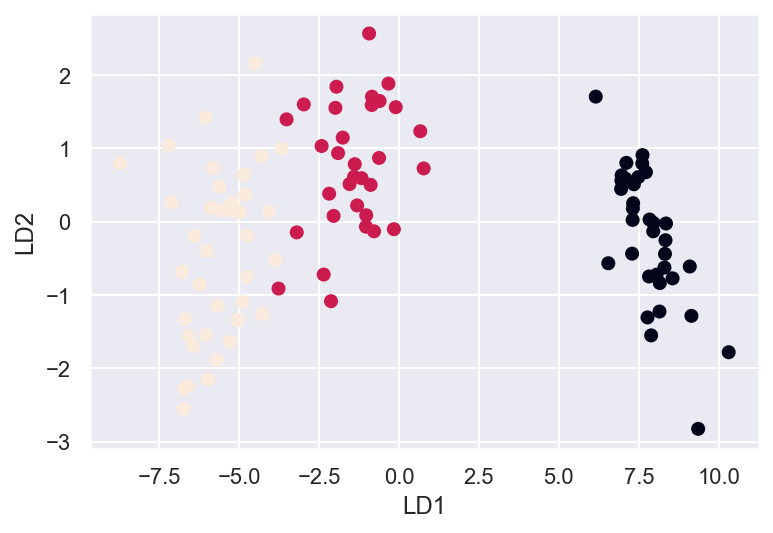

In [73]:
import matplotlib.pyplot as plt
plt.xlabel("LD1")
plt.ylabel("LD2")


plt.scatter(X_LDA[: , 0], X_LDA[:, 1] , c= y_train)

In [79]:
X_test_LDA = lda.transform (X_test_scaled)
X_test_LDA

array([[-6.68570079, -1.46633989],
       [-0.66618058,  2.51798076],
       [ 9.64172871, -1.92452449],
       [-6.07978603,  1.04122003],
       [ 7.82024209, -0.11522561],
       [-7.99924466, -1.89829795],
       [ 8.17911864, -0.81112357],
       [-1.80116131, -0.09944405],
       [-2.00550058,  0.87980334],
       [-0.63354696,  0.43721934],
       [-5.17206675,  2.24334971],
       [-1.57223229, -0.46260885],
       [-2.14291659,  1.4566736 ],
       [-2.15266362,  0.43642697],
       [-2.55163649,  0.68842063],
       [ 8.43330126, -0.32622003],
       [-2.43776518,  0.21176984],
       [-2.39600706,  1.64601702],
       [ 7.09264774,  0.34043384],
       [ 8.89753561, -1.97093371],
       [-5.39432675, -0.51224592],
       [-2.8453458 ,  0.07570874],
       [ 6.54722283,  0.33898181],
       [ 6.71769497,  0.89241415],
       [-3.83501953, -0.15165943],
       [ 8.79213069, -0.9800629 ],
       [ 6.87351864, -1.08701263],
       [-1.14753041,  0.53367193],
       [-0.08589062,

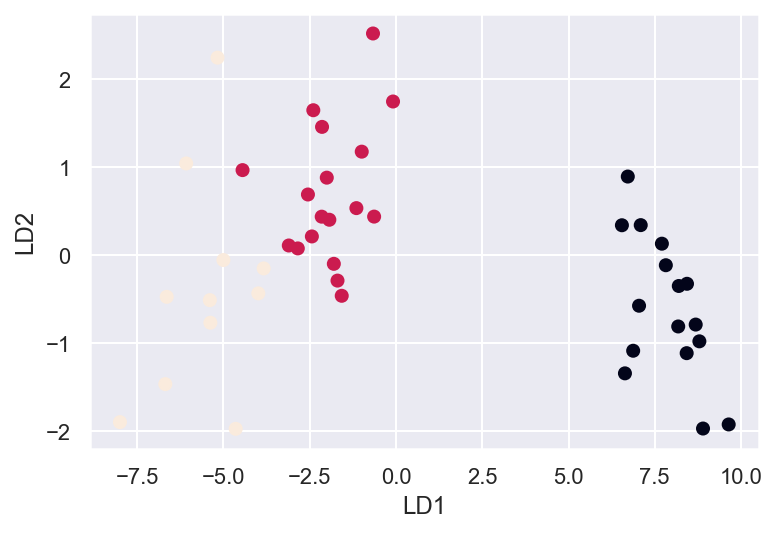

In [81]:
plt.xlabel("LD1")
plt.ylabel("LD2")


plt.scatter(X_test_LDA [: , 0], X_test_LDA [:, 1] , c= y_test)

In [26]:
X_train_lda = lda.fit(X_train_scaled,y_train).transform(X_train_scaled)
X_test_lda = lda.transform(X_test_scaled)

In [21]:
# select 2 principal components

X_train_lda

array([[-0.93534728,  2.56340654],
       [-4.9854655 ,  0.12984179],
       [-6.71818728, -2.28054655],
       [-4.50416279,  2.1562057 ],
       [-6.05586017,  1.42531684],
       [-0.85339282,  1.58864502],
       [-6.24525673, -0.85251282],
       [-2.35585784, -0.7209366 ],
       [-0.84540183,  1.70265893],
       [-4.07198666,  0.13954656],
       [-3.67867911,  0.99586764],
       [-4.85461429,  0.63957594],
       [-4.815563  ,  0.36717819],
       [-1.03351774, -0.06914412],
       [-4.74968477, -0.75150098],
       [-2.12692883, -1.0841014 ],
       [ 6.96274732,  0.6311119 ],
       [-5.49216896,  0.15037761],
       [-1.90661334,  0.93348185],
       [-0.15965983, -0.10313754],
       [-1.76011418,  1.14487246],
       [-2.18415219,  0.38057744],
       [-5.10785032,  0.13432765],
       [ 8.5552578 , -0.77296709],
       [ 7.72225853,  0.67356318],
       [-5.21505839,  0.26102083],
       [-1.17102799,  0.59183631],
       [ 7.83631832,  0.02869204],
       [ 9.35553499,

In [22]:
# take a look at the new axes for the data and plot them

lda.scalings_

array([[ 1.13900041, -0.14519003],
       [ 0.5028995 , -0.88998308],
       [-4.54370903,  1.8899462 ],
       [-2.03103272, -2.19576071]])

In [23]:
# what about the variability?

lda.explained_variance_ratio_

array([0.99231557, 0.00768443])

In [24]:
# Run a Random Forest Classifier with the transformed data


from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
forest_lda = RandomForestClassifier()
forest_lda.fit(X_train_lda, y_train)
y_pred_lda = forest_lda.predict(X_test_lda)
metrics.accuracy_score(y_test, y_pred_lda)

0.9777777777777777

In [25]:
#Check the new acuracy! Is it higher or lower than what you obtain selecting 2 features and applying a Random Forest Directly?


forest = RandomForestClassifier()
forest.fit(X_train_scaled[:,:2], y_train)
y_pred = forest_lda.predict(X_test_scaled[:,:2])
metrics.accuracy_score(y_test, y_pred)

0.4